In [1]:
cd ..

/home/tommy/Scrivania/Polimi/Honours Programme/SCFR


In [2]:
from games.hanabi import *
from utilities.drawing import draw_tree

In [3]:
%load_ext autoreload
%autoreload 2

In [73]:
tree = build_hanabi_tree(num_players = 2, num_colors = 1, color_distribution = [1, 1], num_cards_per_player = 1)

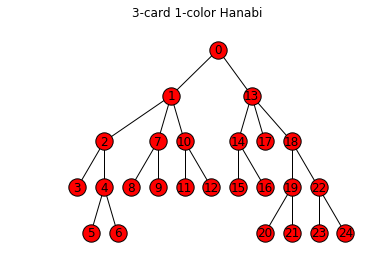

In [74]:
draw_tree(tree, title = "3-card 1-color Hanabi")

In [75]:
tree.display()

Player -42 - Infoset -42 - Node 0
Player 0 - Infoset 1 - Node 1 (children of Node0 via Action [(1, 1), (2, 1)])
Player 0 - Infoset 6 - Node 13 (children of Node0 via Action [(2, 1), (1, 1)])
Player 1 - Infoset 2 - Node 2 (children of Node1 via Action c1.n2-P0)
Player 1 - Infoset 4 - Node 7 (children of Node1 via Action d.0-P0)
Player 1 - Infoset 5 - Node 10 (children of Node1 via Action p.0-P0)
Leaf3 (children of Node2 via Action p.0-P1) -  utility is [0, 0]
Player 0 - Infoset 3 - Node 4 (children of Node2 via Action d.0-P1)
Leaf5 (children of Node4 via Action d.0-P0) -  utility is [0, 0]
Leaf6 (children of Node4 via Action p.0-P0) -  utility is [1, 1]
Leaf8 (children of Node7 via Action p.0-P1) -  utility is [0, 0]
Leaf9 (children of Node7 via Action d.0-P1) -  utility is [0, 0]
Leaf11 (children of Node10 via Action p.0-P1) -  utility is [2, 2]
Leaf12 (children of Node10 via Action d.0-P1) -  utility is [1, 1]
Player 1 - Infoset 7 - Node 14 (children of Node13 via Action d.0-P0)
Leaf1

In [76]:
tree = build_hanabi_tree(num_players = 2, num_colors = 1, color_distribution = [2, 1], num_cards_per_player = 1)

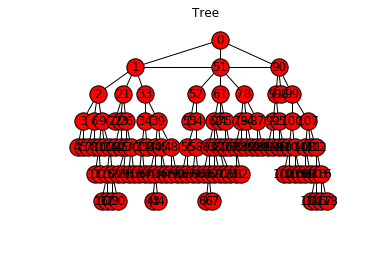

In [77]:
draw_tree(tree)

In [87]:
tree.root.children

[Player 0 - Infoset 1 - Node 1 (children of Node0 via Action [(1, 1), (1, 1), (2, 1)]),
 Player 0 - Infoset 23 - Node 51 (children of Node0 via Action [(1, 1), (2, 1), (1, 1)]),
 Player 0 - Infoset 1 - Node 90 (children of Node0 via Action [(2, 1), (1, 1), (1, 1)])]

In [89]:
_t = build_hanabi_tree(2, 2, [2, 1], 1, display_progress = True)

--- Processing deck [(1, 2), (2, 1), (1, 1), (1, 1), (2, 2), (1, 2)] (1/180) ---
--- Processing deck [(1, 1), (1, 2), (2, 2), (1, 1), (1, 2), (2, 1)] (2/180) ---
--- Processing deck [(1, 2), (1, 2), (2, 1), (2, 2), (1, 1), (1, 1)] (3/180) ---
--- Processing deck [(1, 2), (1, 1), (2, 1), (2, 2), (1, 2), (1, 1)] (4/180) ---
--- Processing deck [(2, 1), (1, 1), (1, 1), (1, 2), (2, 2), (1, 2)] (5/180) ---
--- Processing deck [(1, 1), (2, 2), (1, 2), (2, 1), (1, 2), (1, 1)] (6/180) ---
--- Processing deck [(1, 1), (1, 2), (2, 2), (2, 1), (1, 2), (1, 1)] (7/180) ---
--- Processing deck [(2, 1), (1, 2), (1, 2), (1, 1), (1, 1), (2, 2)] (8/180) ---
--- Processing deck [(2, 2), (1, 1), (1, 2), (2, 1), (1, 1), (1, 2)] (9/180) ---
--- Processing deck [(1, 1), (1, 2), (2, 2), (1, 2), (2, 1), (1, 1)] (10/180) ---
--- Processing deck [(1, 1), (2, 1), (2, 2), (1, 2), (1, 2), (1, 1)] (11/180) ---
--- Processing deck [(2, 1), (1, 2), (1, 1), (2, 2), (1, 1), (1, 2)] (12/180) ---
--- Processing deck [(2, 

--- Processing deck [(2, 1), (1, 2), (1, 1), (1, 2), (2, 2), (1, 1)] (102/180) ---
--- Processing deck [(2, 2), (1, 1), (1, 1), (1, 2), (1, 2), (2, 1)] (103/180) ---
--- Processing deck [(1, 2), (2, 1), (1, 2), (1, 1), (1, 1), (2, 2)] (104/180) ---
--- Processing deck [(1, 1), (2, 1), (1, 2), (1, 1), (2, 2), (1, 2)] (105/180) ---
--- Processing deck [(2, 2), (1, 1), (1, 2), (1, 1), (2, 1), (1, 2)] (106/180) ---
--- Processing deck [(1, 1), (1, 2), (2, 2), (1, 2), (1, 1), (2, 1)] (107/180) ---
--- Processing deck [(1, 1), (2, 2), (1, 1), (1, 2), (2, 1), (1, 2)] (108/180) ---
--- Processing deck [(1, 1), (1, 1), (1, 2), (2, 1), (2, 2), (1, 2)] (109/180) ---
--- Processing deck [(2, 1), (1, 1), (2, 2), (1, 2), (1, 2), (1, 1)] (110/180) ---
--- Processing deck [(1, 2), (1, 1), (1, 2), (2, 2), (1, 1), (2, 1)] (111/180) ---
--- Processing deck [(1, 1), (1, 1), (2, 1), (1, 2), (1, 2), (2, 2)] (112/180) ---
--- Processing deck [(1, 1), (2, 2), (2, 1), (1, 1), (1, 2), (1, 2)] (113/180) ---
--- 

In [90]:
_t.node_count

2899827

In [91]:
_t.infoset_count

1181601

In [92]:
_t.max_depth

12